In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
import condacolab
condacolab.check()

In [ ]:
!conda create --name maltaomics
!conda activate maltaomics
!conda install -c conda-forge rdkit

In [22]:
import rdkit # compchem library
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import rdBase
print(rdkit.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

2023.03.3


Data for this exercise taken from the [DUD-E validation dataset](http://dude.docking.org/targets/try1).

In [23]:
def get_mols(smi_file):
    mols = []
    with open(smi_file) as f:
        for l in f:
            mols.append(l.split()[0])
    return mols

In [24]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

In [25]:
n = 200
actives = [ Chem.MolFromSmiles(m) for m in get_mols('hivpr_actives_final.ism')[:n] ]
decoys = [ Chem.MolFromSmiles(m) for m in get_mols('hivpr_decoys_final.ism')[:n] ]

query = actives[0]

df = pd.DataFrame()
df['molecule'] = actives[1:] + decoys
actual_class = ([1] * (len(actives)-1)) + ([0] * len(decoys))
df['class'] = actual_class
df

,molecule,class
0,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a61310>,1
1,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a60350>,1
2,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a61000>,1
3,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a60cf0>,1
4,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a604a0>,1
...,...,...
394,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcdc4a0>,0
395,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcdc510>,0
396,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcdc580>,0
397,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcdc5f0>,0


In [28]:
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit import DataStructs

def get_fp(mol):
    return GetMorganFingerprint(mol, 2)

def sim(fp1, fp2):
    return DataStructs.DiceSimilarity(fp1, fp2)


query_fp = get_fp(query)

df['fp'] = df['molecule'].apply(get_fp)
df['sim_score'] = df['fp'].apply(lambda x: sim(x, query_fp))
df['smiles'] = df['molecule'].apply(lambda m:Chem.MolToSmiles(m))
df2 = df.sort_values('sim_score', ascending=False)
df2

,molecule,class,fp,sim_score,smiles
181,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcd6180>,1,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.900000,COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...
0,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a61310>,1,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.801843,CC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)O[C@@H]1C[C@@H]...
2,<rdkit.Chem.rdchem.Mol object at 0x7c64d5a61000>,1,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.782222,COc1ccc(S(=O)(=O)N(C[C@@H](O)[C@H](Cc2ccccc2)N...
185,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcd6340>,1,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.778846,COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...
143,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcd50e0>,1,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.764151,COc1ccc(S(=O)(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc2c...
...,...,...,...,...,...
57,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcc6ab0>,1,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.176471,Nc1ncnc2c1ncn2C1O[C@H](COP(=O)(O)O)[C@@H](O)[C...
317,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcda1f0>,0,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.172973,CCOc1cc(/C=C2\SC([N-]c3cccc(Cl)c3C)=NC2=O)c(Br...
392,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcdc3c0>,0,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.172043,CCOc1c(Cl)cc(/C=C2\C(=O)N(c3ccc(Br)c(C)c3)C(=O...
243,<rdkit.Chem.rdchem.Mol object at 0x7c64cfcd8190>,0,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...,0.165746,CCOc1cc(/C=C2/SC(=S)N=C2[O-])cc(Br)c1OCC(=O)N(...


In [29]:
# Save and downlaod the file
from google.colab import files
df.to_csv('fp_similarity.csv', sep='\t')
files.download('fp_similarity.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(df2['class'], df2['sim_score'])
auc = metrics.roc_auc_score(df2['class'], df2['sim_score'])

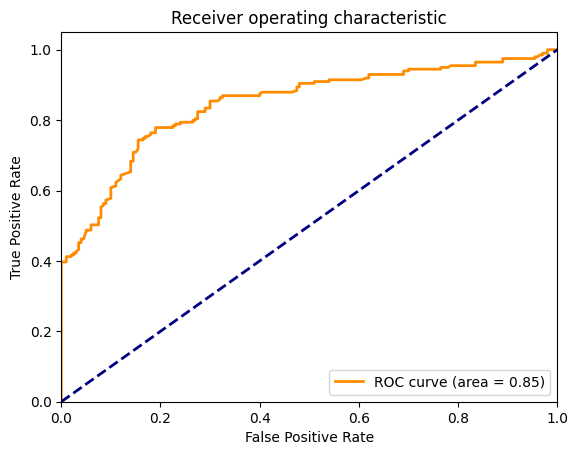

In [31]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Practical Tasks

* Can you build an ML model which out performs this unsophisticated search?
* How would you compare performance between the two models?